In [1]:
#@title Load the imports

# from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

tf.keras.backend.set_floatx('float32')

print("Imported the modules.")

Imported the modules.


In [2]:
# Load the dataset
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

# Scale the labels
scale_factor = 1000.0
# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

# Shuffle the examples
train_df = train_df.reindex(np.random.permutation(train_df.index))

Represent latitude and longitude as floating-point values
Previous Colabs trained on only a single feature or a single synthetic feature. By contrast, this exercise trains on two features. Furthermore, this Colab introduces feature columns, which provide a sophisticated way to represent features.

You create feature columns as possible:

Call a tf.feature_column method to represent a single feature, single feature cross, or single synthetic feature in the desired way. For example, to represent a certain feature as floating-point values, call tf.feature_column.numeric_column. To represent a certain feature as a series of buckets or bins, call tf.feature_column.bucketized_column.
Assemble the created representations into a Python list.
A neighborhood's location is typically the most important feature in determining a house's value. The California Housing dataset provides two features, latitude and longitude that identify each neighborhood's location.

The following code cell calls tf.feature_column.numeric_column twice, first to represent latitude as floating-point value and a second time to represent longitude as floating-point values.

This code cell specifies the features that you'll ultimately train the model on and how each of those features will be represented. The transformations (collected in fp_feature_layer) don't actually get applied until you pass a DataFrame to it, which will happen when we train the model.



In [3]:
# Create an empty list that will eventually hold all feature columns.
feature_columns = []

# Create a numerical feature column to represent latitude.
latitude = tf.feature_column.numeric_column("latitude")
feature_columns.append(latitude)

# Create a numerical feature column to represent longitude.
longitude = tf.feature_column.numeric_column("longitude")
feature_columns.append(longitude)

# Convert the list of feature columns into a layer that will ultimately become
# part of the model. Understanding layers is not important right now.
fp_feature_layer = layers.DenseFeatures(feature_columns)

In [4]:
#@title Define functions to create and train a model, and a plotting function
def create_model(my_learning_rate, feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the mean absolute error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse   


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.94, rmse.max()* 1.05])
  plt.show()  

print("Defined the create_model, train_model, and plot_the_loss_curve functions.")

Defined the create_model, train_model, and plot_the_loss_curve functions.


C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
170/170 [==============================] - 1s 2ms/step - loss: 13517.4531 - root_mean_squared_error: 116.2646
Epoch 2/30
170/170 [==============================] - 0s 2ms/step - loss: 13439.8564 - root_mean_squared_error: 115.9304
Epoch 3/30
170/170 [==============================] - 0s 2ms/step - loss: 13387.8457 - root_mean_squared_error: 115.7059
Epoch 4/30
170/170 [==============================] - 0s 2ms/step - loss: 13344.1768 - root_mean_squared_error: 115.5170
Epoch 5/30
170/170 [==============================] - 0s 2ms/step - loss: 13301.3955 - root_mean_squared_error: 115.3317
Epoch 6/30
170/170 [==============================] - 0s 2ms/step - loss: 13270.7588 - root_mean_squared_error: 115.1988
Epoch 7/30
170/170 [==============================] - 0s 2ms/step - loss: 13235.1982 - root_mean_squared_error: 115.0443
Epoch 8/30
170/170 [=======================

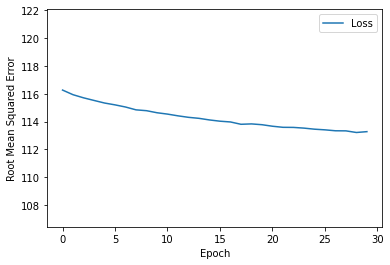


: Evaluate the new model against the test set:
Consider rewriting this model with the Functional API.
30/30 [==============================] - 0s 2ms/step - loss: 12162.1104 - root_mean_squared_error: 110.2820


[12162.1103515625, 110.2819595336914]

In [5]:
# The following variables are the hyperparameters.
learning_rate = 0.05
epochs = 30
batch_size = 100
label_name = 'median_house_value'

# Create and compile the model's topography.
my_model = create_model(learning_rate, fp_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

Task 1: Why aren't floating-point values a good way to represent latitude and longitude?
Are floating-point values a good way to represent latitude and longitude?

In [6]:
#@title Double-click to view an answer to Task 1.

# No. Representing latitude and longitude as 
# floating-point values does not have much 
# predictive power. For example, neighborhoods at 
# latitude 35 are not 36/35 more valuable 
# (or 35/36 less valuable) than houses at 
# latitude 36.

# Representing `latitude` and `longitude` as 
# floating-point values provides almost no 
# predictive power. We're only using the raw values 
# to establish a baseline for future experiments 
# with better representations.

Represent latitude and longitude in buckets
The following code cell represents latitude and longitude in buckets (bins). Each bin represents all the neighborhoods within a single degree. For example, neighborhoods at latitude 35.4 and 35.8 are in the same bucket, but neighborhoods in latitude 35.4 and 36.2 are in different buckets.

The model will learn a separate weight for each bucket. For example, the model will learn one weight for all the neighborhoods in the "35" bin", a different weight for neighborhoods in the "36" bin, and so on. This representation will create approximately 20 buckets:

10 buckets for latitude.
10 buckets for longitude.

In [7]:
resolution_in_degrees = 1.0 

# Create a new empty list that will eventually hold the generated feature column.
feature_columns = []

# Create a bucket feature column for latitude.
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), 
                                     int(max(train_df['latitude'])), 
                                     resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, 
                                               latitude_boundaries)
feature_columns.append(latitude)

# Create a bucket feature column for longitude.
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), 
                                      int(max(train_df['longitude'])), 
                                      resolution_in_degrees))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, 
                                                longitude_boundaries)
feature_columns.append(longitude)

# Convert the list of feature columns into a layer that will ultimately become
# part of the model. Understanding layers is not important right now.
buckets_feature_layer = layers.DenseFeatures(feature_columns)

Epoch 1/35
Consider rewriting this model with the Functional API.


C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Consider rewriting this model with the Functional API.
170/170 [==============================] - 1s 2ms/step - loss: 52046.6875 - root_mean_squared_error: 228.1374
Epoch 2/35
170/170 [==============================] - 0s 2ms/step - loss: 44658.2305 - root_mean_squared_error: 211.3249
Epoch 3/35
170/170 [==============================] - 0s 2ms/step - loss: 38061.5430 - root_mean_squared_error: 195.0937
Epoch 4/35
170/170 [==============================] - 0s 2ms/step - loss: 32262.5430 - root_mean_squared_error: 179.6178
Epoch 5/35
170/170 [==============================] - 0s 2ms/step - loss: 27233.5684 - root_mean_squared_error: 165.0260
Epoch 6/35
170/170 [==============================] - 0s 2ms/step - loss: 22977.5684 - root_mean_squared_error: 151.5835
Epoch 7/35
170/170 [==============================] - 0s 2ms/step - loss: 19481.3477 - root_mean_squared_error: 139.5756
Epoch 8/35
170/170 [==============================] - 0s 2ms/step - loss: 16659.9902 - root_mean_squared_erro

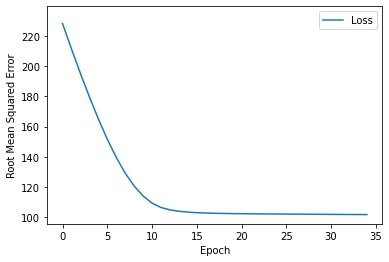


: Evaluate the new model against the test set:
Consider rewriting this model with the Functional API.
30/30 [==============================] - 0s 2ms/step - loss: 10201.0576 - root_mean_squared_error: 101.0003


[10201.0576171875, 101.00028228759766]

In [8]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the buckets_feature_layer.
my_model = create_model(learning_rate, buckets_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

Task 2: Did buckets outperform floating-point representations?
Compare the model's root_mean_squared_error values for the two representations (floating-point vs. buckets)? Which model produced lower losses?

In [9]:
# Bucket representation outperformed 
# floating-point representations.  
# However, you can still do far better.

Task 3: What is a better way to represent location?
Buckets are a big improvement over floating-point values. Can you identify an even better way to identify location with latitude and longitude?